In [10]:
import tushare as ts


print(ts.__version__)
#　バージョンを確認

1.4.13


In [11]:
ts.set_token('1f3d63f1a1d15d5c7864f4c9eff475702b5970669c597224a1b8a77d')
pro = ts.pro_api()
pro = ts.pro_api('1f3d63f1a1d15d5c7864f4c9eff475702b5970669c597224a1b8a77d')
# tokenを設定

In [160]:
# 株式の基本情報を取得
df1 = pro.stock_basic(**{
    "ts_code": "",
    "name": "",
    "exchange": "",
    "market": "",
    "is_hs": "",
    "list_status": "",
    "limit": "",
    "offset": ""
}, fields=[
    "ts_code",
    "symbol",
    "name",
    "area",
    "industry",
    "market",
    "list_date",
    "enname",
    "fullname",
    "list_status",
    "curr_type",
    "exchange"
])      

In [161]:
df1
# データフレームを確認

,ts_code,symbol,name,area,industry,fullname,enname,market,exchange,curr_type,list_status,list_date
0,000001.SZ,000001,平安银行,深圳,银行,平安银行股份有限公司,"Ping An Bank Co., Ltd.",主板,SZSE,CNY,L,19910403
1,000002.SZ,000002,万科A,深圳,全国地产,万科企业股份有限公司,"China Vanke Co.,Ltd.",主板,SZSE,CNY,L,19910129
2,000004.SZ,000004,国华网安,深圳,软件服务,深圳国华网安科技股份有限公司,Shenzhen Guohua Network Security Technology Co...,主板,SZSE,CNY,L,19910114
3,000006.SZ,000006,深振业A,深圳,区域地产,深圳市振业(集团)股份有限公司,"Shenzhen Zhenye(Group) Co., Ltd.",主板,SZSE,CNY,L,19920427
4,000007.SZ,000007,全新好,深圳,其他商业,深圳市全新好股份有限公司,"Shenzhen Quanxinhao Co,.Ltd.",主板,SZSE,CNY,L,19920413
...,...,...,...,...,...,...,...,...,...,...,...,...
5379,920111.BJ,920111,聚星科技,None,None,温州聚星科技股份有限公司,"Wenzhou Juxing Science And Technology Co.,Ltd.",北交所,BSE,CNY,L,20241111
5380,920116.BJ,920116,星图测控,None,None,中科星图测控技术股份有限公司,"Geovis Insighter Technology Co.,Ltd.",北交所,BSE,CNY,L,20250102
5381,920118.BJ,920118,太湖远大,None,None,浙江太湖远大新材料股份有限公司,"Zhejiang Taihu Yuanda New Material Co., Ltd",北交所,BSE,CNY,L,20240822
5382,920128.BJ,920128,胜业电气,None,None,胜业电气股份有限公司,"Shengye Electric Co., Ltd.",北交所,BSE,CNY,L,20241129


In [158]:
import baostock as bs
import pandas as pd
import json
import time
# baostockをインポート

# baostockにログイン
lg = bs.login()
print('login respond error_code:'+lg.error_code)# ログインのエラーコードを確認
print('login respond  error_msg:'+lg.error_msg)# ログインのエラーメッセージを確認

login success!
login respond error_code:0
login respond  error_msg:success


In [80]:
start_date = '2023-12-01' # 開始日
end_date = '2024-12-30' # 終了日
data_list = []
number = 1 
# データを株式コードごとに取得
for i in df1['ts_code']:
    if 'SH' in i:
        i = i.strip('.SH')
        i = 'sh.' + i
    elif 'SZ' in i:
        i = i.strip('.SZ')
        i = 'sz.' + i
    if 'BJ' not in i:
        rs = bs.query_history_k_data_plus(i,
            "date,code,open,high,low,close,preclose,volume,\
                amount,adjustflag,tradestatus,pctChg,isST,turn,peTTM", # データの項目
            start_date=start_date, end_date=end_date, # 開始日と終了日を指定
            frequency="d", # 日次データを指定
            adjustflag="1")# 権利落ち調整指数を指定
        print('query_history_k_data_plus respond error_code:'+rs.error_code) # エラーコードを確認
        print('query_history_k_data_plus respond  error_msg:'+rs.error_msg) # エラーメッセージを確認
        print(number) # 読み込みの進捗を確認
        number += 1
    # データをリストに追加
        while (rs.error_code == '0') & rs.next():
            data_list.append(rs.get_row_data())
# データをデータフレームに変換
result = pd.DataFrame(data_list, columns=rs.fields)
bs.logout

query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
1
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
2
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
3
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
4
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
5
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
6
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
7
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
8
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
9
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  

<function baostock.login.loginout.logout(user_id='anonymous')>

In [162]:
start_date = '2023-12-01'  # 開始日
end_date = '2024-12-30'  # 終了日
data_list = []
number = 1
# データを株式コードごとに取得
for i in df1['ts_code']:
    if 'SH' in i:
        i = i.strip('.SH')
        i = 'sh.' + i
    elif 'SZ' in i:
        i = i.strip('.SZ')
        i = 'sz.' + i
    if 'BJ' not in i:
        rs = bs.query_history_k_data_plus(i,
                                          "date,code,open,high,low,close,preclose,volume,\
                                              amount,adjustflag,tradestatus,pctChg,isST,turn,peTTM",  # データの項目
                                          start_date=start_date, end_date=end_date,  # 開始日と終了日を指定
                                          frequency="d",  # 日次データを指定
                                          adjustflag="2")  # 権利落ち調整指数を指定
        print('query_history_k_data_plus respond error_code:' + rs.error_code)  # エラーコードを確認
        print('query_history_k_data_plus respond  error_msg:' + rs.error_msg)  # エラーメッセージを確認
        print(number)  # 読み込みの進捗を確認
        number += 1
        # データをリストに追加
        while (rs.error_code == '0') & rs.next():
            data_list.append(rs.get_row_data())
# データをデータフレームに変換
result_ajusted = pd.DataFrame(data_list, columns=rs.fields)
bs.logout

query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
1
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
2
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
3
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
4
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
5
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
6
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
7
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
8
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
9
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  

<function baostock.login.loginout.logout(user_id='anonymous')>

In [163]:
result_ajusted

,date,code,open,high,low,close,preclose,volume,amount,adjustflag,tradestatus,pctChg,isST,turn,peTTM
0,2023-12-01,sz.000001,8.8138854000,8.8412860800,8.7499504800,8.8230189600,8.8412860800,77805699,749668363.8500,2,1,-0.206600,0,0.400900,3.865816
1,2023-12-04,sz.000001,8.8321525200,8.8412860800,8.7773511600,8.7956182800,8.8230189600,60543785,583664338.4100,2,1,-0.310600,0,0.312000,3.853811
2,2023-12-05,sz.000001,8.7773511600,8.7864847200,8.6494813200,8.6586148800,8.7956182800,78737848,750961219.9100,2,1,-1.557600,0,0.405700,3.793783
3,2023-12-06,sz.000001,8.6220806400,8.7408169200,8.5855464000,8.6768820000,8.6586148800,75305592,714029468.7000,2,1,0.211000,0,0.388100,3.801786
4,2023-12-07,sz.000001,8.6677484400,8.6677484400,8.5672792800,8.6220806400,8.6768820000,58538019,552224831.1700,2,1,-0.631600,0,0.301700,3.777775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330437,2024-12-24,sh.689009,45.4300000000,45.8500000000,45.2100000000,45.4000000000,45.5400000000,6381844,290275278.6900,2,1,-0.307400,0,1.168000,27.386280
1330438,2024-12-25,sh.689009,45.3900000000,45.5800000000,44.3000000000,45.0100000000,45.4000000000,6357913,285823706.8100,2,1,-0.859000,0,1.163600,27.151024
1330439,2024-12-26,sh.689009,45.1100000000,46.0900000000,44.8800000000,45.0900000000,45.0100000000,6335058,288399173.3700,2,1,0.177700,0,1.159400,27.199282
1330440,2024-12-27,sh.689009,45.1200000000,48.0800000000,45.0600000000,46.8400000000,45.0900000000,13048008,615482074.9700,2,1,3.881100,0,2.388000,28.254920


In [233]:
result['date'] = pd.to_datetime(result['date'])
result = result.sort_values(by='date', ascending=True, ignore_index=True)
result['code'] = result['code'].str.replace(r'^(sz|sh)\.', '', regex=True)
result['open'] = result['open'].astype(float)
result['close'] = result['close'].astype(float)
# データを日付順に並び替え

In [165]:
result_ajusted['date'] = pd.to_datetime(result_ajusted['date'])
result_ajusted = result_ajusted.sort_values(by='date', ascending=True, ignore_index=True)
result_ajusted['code'] = result_ajusted['code'].str.replace(r'^(sz|sh)\.', '', regex=True)
result_ajusted['open'] = result_ajusted['open'].astype(float)
result_ajusted['close'] = result_ajusted['close'].astype(float)

In [82]:
result.to_csv("history_A_stock_k_data111.csv", index=False)
# データをcsvファイルに保存

In [215]:
result = pd.read_csv('history_A_stock_k_data111.csv')
# データフレームを確認

In [97]:
df_in_27 = result[result['date'].isin([pd.to_datetime('2024-12-27')])]
df_in_27['pct_change'] = (df_in_27['open'] - df_in_27['close']) / df_in_27['close']
X1 = df_in_27.loc[:, ['code', 'pct_change']]
X1

/var/folders/y3/9kxykjnn5kb8y6_f1xftvhdw0000gn/T/ipykernel_14659/365928226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_in_27['pct_change'] = (df_in_27['open'] - df_in_27['close']) / df_in_27['close']


,code,pct_change
1320201,000722,-0.019076
1320202,000504,-0.038150
1320203,000520,-0.026104
1320204,000333,0.007425
1320205,000627,-0.015905
...,...,...
1325316,002524,-0.020672
1325317,600011,-0.013100
1325318,002528,0.000000
1325319,002360,-0.037182


In [98]:
start_date = '2023-12-27'
end_date = '2024-12-27'

df_last_year = result[(result['date'] >= start_date) & (result['date'] <= end_date)].copy()

#最大ドローダウンを計算する関数を定義する
def calc_drawdown(sub_df):
    sub_df = sub_df.sort_values(by='date')
    sub_df['cummax_close'] = sub_df['close'].cummax()
    sub_df['drawdown'] = (sub_df['close'] - sub_df['cummax_close']) / sub_df['cummax_close']
    return pd.Series({
        'max_drawdown': sub_df['drawdown'].min()
    })

X2 = df_last_year.groupby('code').apply(calc_drawdown)
X2

/var/folders/y3/9kxykjnn5kb8y6_f1xftvhdw0000gn/T/ipykernel_14659/3821175025.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  X2 = df_last_year.groupby('code').apply(calc_drawdown)


,max_drawdown
code,
000001,-0.113002
000002,-0.408745
000004,-0.501185
000006,-0.281184
000007,-0.299595
...,...
688799,-0.366571
688800,-0.504185
688819,-0.291357


In [100]:
start_date = '2023-12-27'
end_date = '2024-12-27'
df_last_year = result[(result['date'] >= start_date) & (result['date'] <= end_date)].copy()

def calc_annual_return(sub_df):
    sub_df = sub_df.sort_values(by='date')
    start_price = sub_df.iloc[0]['close']
    end_price = sub_df.iloc[-1]['close']
    annual_return = (end_price - start_price) / start_price
    return pd.Series({
        'annual_return': annual_return
    })

X3 = df_last_year.groupby('code').apply(calc_annual_return)

X3

/var/folders/y3/9kxykjnn5kb8y6_f1xftvhdw0000gn/T/ipykernel_14659/3958822351.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  X3 = df_last_year.groupby('code').apply(calc_annual_return)


,annual_return
code,
000001,0.420201
000002,-0.257620
000004,-0.075941
000006,0.762637
000007,0.485356
...,...
688799,-0.091415
688800,0.507040
688819,0.055191


In [236]:
start_date = '2023-12-27'
end_date   = '2024-12-27'
df_last_year = result[(result['date'] >= start_date) & (result['date'] <= end_date)].copy()


def calc_annual_volatility(sub_df):
    sub_df = sub_df.sort_values(by='date')
    sub_df['daily_return'] = sub_df['close'].pct_change()
    daily_std = sub_df['daily_return'].std()
    return pd.Series({'annual_volatility': daily_std})

X4 = df_last_year.groupby('code').apply(calc_annual_volatility)

X4

/var/folders/y3/9kxykjnn5kb8y6_f1xftvhdw0000gn/T/ipykernel_14659/1970196373.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  X4 = df_last_year.groupby('code').apply(calc_annual_volatility)


,annual_volatility
code,
000001,0.016578
000002,0.029099
000004,0.050493
000006,0.037647
000007,0.030427
...,...
688799,0.030254
688800,0.047365
688819,0.029143


In [34]:
import urllib.request
import urllib.parse


'''
引数で指定されたcode(銘柄コード)とpage(ページ番号)を元に、
リクエスト用のURLとリクエストヘッダを作成し、Requestオブジェクトを返す関数create_requestを作る。
'''
def create_request(code, page):
    base_url = 'https://t.10jqka.com.cn/lgt/post/open/api/forum/post/recent/compatibility?'
    data = {
        "code": code, # 銘柄コード
        "page": page, # ページ番号
        "page_size": 15,
        "form_id": 0,
    }
     # urllib.parse.urlencodeで辞書をURLエンコード
    data = urllib.parse.urlencode(data)
     # 完成したURL
    url = base_url + data
    # リクエストヘッダ
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36'
    }
    request = urllib.request.Request(url=url, headers=headers)
    return  request


'''
Requestオブジェクトを用いてURLにアクセスし、レスポンスを取得して返す関数です。
'''
def get_content(request):
    response = urllib.request.urlopen(request)
    content = response.read().decode('utf-8')
    return content


'''
取得したcontentをJSONファイルとして保存する関数です。
大量のデータを扱うので、途中でのエラーが発生してデータをなくすことを防ぐための関数である。
'''
def down_load(page, content):
    with open('tonghuashun1_' + str(page) + '.json', 'w', encoding='utf-8') as fp:
        fp.write(content)


'''
関数がちゃんとその機能を果たしているかを確認
'''
for page in range(1, 2):
    request = create_request('000001', page)
    content = get_content(request)
    print(type(content))
    down_load(page, content)

<class 'str'>


In [105]:
'''
スクレイピングする予定の株式コードのリストを用意する
'''
stock_code = []
for i in df1['ts_code']:
    if 'SH' in i:
        i = i.strip('.SH')
        stock_code.append(i)
    elif 'SZ' in i:
        i = i.strip('.SZ')
        stock_code.append(i)
'''
データの解析時間を縮めるためにstock_codeをファイルとして保存し別のとこで、このファイルを使って解析とスクレピングを同時に行う
'''
with open("stock_code.json", "w", encoding="utf-8") as f:
    json.dump(stock_code, f, ensure_ascii=False, indent=2)

In [77]:
import os
import random
import json
import time
from urllib.error import URLError


# 進捗度を表示するためにステップを設定する
step = 0

'''
コメントデータをforループを使って株式ごとにスクレーピングする
'''
for code in stock_code:
    # 出力先のファイルパスを生成
    output_path = os.path.join('/Users/lamort/Desktop/pycharm/pythonProject/scraping/stock_comment_data', f"stock_comment{code}.json")
    # もし既に同名のファイルが存在する場合は、スクレイピングをスキップする
    # 大量のデータを扱うから、途中で止まっても再開するためのコードである
    if os.path.exists(output_path):       
        print(f"ファイル {output_path} はすでに存在します。 {code} はすでにスクレーピング済みなのでスキップします。")
        continue
        
    dd = []
    # ページ番号を1から10まで繰り返し処理
    for page in range(1, 13):
        # create_request関数でRequestオブジェクトを生成（引数に銘柄コードとページ番号）
        max_retries = 3
        for i in range(max_retries):                
            try:
                request = create_request(code, page)
                # get_content関数でリクエストを実行し、取得したコンテンツ（文字列）をcontentとして受け取る
                content = get_content(request)
                # contentはJSON形式の文字列なので、json.loadsでPythonの辞書型などに変換
                data = json.loads(content)
                # 取得したdataの中から必要な階層を取り出す
                feed_list = data["data"]["feed"]
                break
            except URLError as e:
                if i < max_retries - 1:
                    time.sleep(1)               
                else:
                    raise e
        # feed_listに含まれる各アイテムを取り出して処理
        for idx, item in enumerate(feed_list):
            # 必要な情報を辞書としてまとめる（コメント・日時）
            dict1 = {'コメント': feed_list[idx]['content'], '日時': feed_list[idx]['ctime']}
            dd.append(dict1)
        # スクレイピングやアクセスが過剰にならないように、1〜3秒ランダムに待機
        time.sleep(random.uniform(0, 2))
    # 最終的にddリストをJSONファイルとして保存
    with open('/Users/lamort/Desktop/pycharm/pythonProject/scraping/stock_comment_data/stock_comment' + str(code) + '.json', 'w', encoding='utf-8') as f:
        json.dump(dd, f, ensure_ascii=False, indent=2)   
    # 処理した銘柄数をカウントアップ
    step += 1
    print(f"{step}銘柄目のスクレーピングが完了しました。")

ファイル /Users/lamort/Desktop/pycharm/pythonProject/scraping/stock_comment_data/stock_comment000001.json はすでに存在します。 000001 はすでにスクレーピング済みなのでスキップします。
ファイル /Users/lamort/Desktop/pycharm/pythonProject/scraping/stock_comment_data/stock_comment000002.json はすでに存在します。 000002 はすでにスクレーピング済みなのでスキップします。
ファイル /Users/lamort/Desktop/pycharm/pythonProject/scraping/stock_comment_data/stock_comment000004.json はすでに存在します。 000004 はすでにスクレーピング済みなのでスキップします。
ファイル /Users/lamort/Desktop/pycharm/pythonProject/scraping/stock_comment_data/stock_comment000006.json はすでに存在します。 000006 はすでにスクレーピング済みなのでスキップします。
ファイル /Users/lamort/Desktop/pycharm/pythonProject/scraping/stock_comment_data/stock_comment000007.json はすでに存在します。 000007 はすでにスクレーピング済みなのでスキップします。
ファイル /Users/lamort/Desktop/pycharm/pythonProject/scraping/stock_comment_data/stock_comment000008.json はすでに存在します。 000008 はすでにスクレーピング済みなのでスキップします。
ファイル /Users/lamort/Desktop/pycharm/pythonProject/scraping/stock_comment_data/stock_comment000009.json はすでに存在します。 000009 はすでにスクレーピン

In [25]:
# 時間データの処理方法の確認
import time

timestamp = 1735268333

time_array = time.localtime(timestamp)
readable_time = time.strftime("%Y-%m-%d %H:%M:%S", time_array)
print(readable_time)

2024-12-27 11:58:53


In [103]:
#　データのクレーニング方法の確認
with open("/Users/lamort/Desktop/pycharm/pythonProject/scraping/stock_comment_data/stock_comment000001.json", "r", encoding="utf-8") as f:
    data = json.load(f)
data


[{'コメント': '<hx_stock>stockName:平安银行,stockCode:000001,market:33</hx_stock> 真是神一样的存在',
  '日時': 1735283167},
 {'コメント': '<hx_stock>stockName:平安银行,stockCode:000001,market:33</hx_stock> 一群做T老六在里面',
  '日時': 1735282536},
 {'コメント': '<hx_stock>stockName:平安银行,stockCode:000001,market:33</hx_stock> 尾盘拉个涨停吧',
  '日時': 1735281901},
 {'コメント': '<hx_stock>stockName:平安银行,stockCode:000001,market:33</hx_stock> 不要买入，买了被套三年',
  '日時': 1735281262},
 {'コメント': '<hx_stock>stockName:平安银行,stockCode:000001,market:33</hx_stock> 接着压，均线也不跟了，越压越买',
  '日時': 1735281192},
 {'コメント': '这二年黑银行股的也忒多了。', '日時': 1735280388},
 {'コメント': '<hx_stock>stockName:平安银行,stockCode:000001,market:33</hx_stock> 专业纺织工出品<img class="emojiface" title="[笑]" src="//i.thsi.cn/sns/circle/wapcircle/emoji/f1.png" />',
  '日時': 1735279932},
 {'コメント': '<hx_stock>stockName:平安银行,stockCode:000001,market:33</hx_stock> <img class="emojiface" title="[棒]" src="//i.thsi.cn/sns/circle/wapcircle/emoji/f27.png" /><img class="emojiface" title="[爱心]" src="//i.thsi.cn/sns

In [104]:
import requests

'''
Baiduのモデルを使うためにaccess_tokenを取得する
'''
def main():
    url = "https://aip.baidubce.com/oauth/2.0/token?client_id=Q8z4FRnRr5kl1zTrQZJ5kwIc&client_secret=gGALLKfrOQtLJGsVjecvgRO8VUaZ3cLD&grant_type=client_credentials"

    payload = json.dumps("")
    headers = {
        'Content-Type': 'application/json',
        'Accept': 'application/json'
    }

    response = requests.request("POST", url, headers=headers, data=payload)

    print(response.text)


if __name__ == '__main__':
    main()

{"refresh_token":"25.9bbb6bd44c83d9a35a6d20d9458f8d92.315360000.2050966473.282335-116872999","expires_in":2592000,"session_key":"9mzdA5O0bGxUfsCnrxIyPdjCGQSNgrnbxgTcXqKtdLCxQiNqOa\/SmIb5nIEWI+Oli8o3ilO2L+Xqizk7Qt51FKDXnjqYkC0=","access_token":"24.89acd1ef2f103cb95769d01b1c1338e2.2592000.1738198473.282335-116872999","scope":"public nlp_dnnlm_cn nlp_simnet nlp_comtag brain_nlp_lexer brain_all_scope brain_nlp_comment_tag brain_nlp_dnnlm_cn brain_nlp_sentiment_classify brain_nlp_simnet brain_nlp_depparser brain_nlp_dnnlm_cn_legacy brain_nlp_simnet_legacy brain_nlp_comment_tag_legacy brain_nlp_keyword brain_nlp_topic brain_nlp_ecnet brain_nlp_emotion brain_nlp_news_summary brain_creation_couplets brain_creation_poem brain_nlp_address ai_custom_pro_apple ai_custom_testface1 ai_custom_kouzhaorenlianshibie ai_custom_chongwugou brain_nlp_titlepredictor brain_nlp_brain_entity_analysis brain_v1_nlp_txt_keywords_extraction brain_v1_nlp_txt_monet wise_adapt lebo_resource_base lightservice_public he

In [ ]:
import os
import re
import json
import datetime
import pandas as pd
import numpy as np
import requests

def compute_stock_mean_probability(stock_code, start_time, end_time):
    """
    指定された銘柄コードと時間範囲に基づき、対応するJSONファイルを読み込み、
    コメントのテキストクリーニングと感情傾向分析を行い、
    ポジティブ確率(positive_prob)の平均値を求める関数です。
    - 該当データがない場合は None を返却します。（スクレピングと同時に実行するからデータがない可能性がある）
    - 27日コメントが10件未満の場合は "データが足りない" を返します。
    """
    
    # 特定のタグや画像タグ、HTMLタグを除去するための正規表現パターン
    pattern = r'<hx_stock>.*?</hx_stock>'
    pattern1 = r'<img.*?>'
    html_tag_pattern = r'<[^>]*>'
    
    # Baidu NLPの感情分析API用トークンとエンドポイント
    my_token = "24.874c7478d6c81180fd7108286bdbf776.2592000.1737887030.282335-116872999"
    url1 = "https://aip.baidubce.com/rpc/2.0/nlp/v1/sentiment_classify"
    
    # リクエストヘッダ（JSON形式を指定）
    headers = {
        'Content-Type': 'application/json',
        'Accept': 'application/json'
    }
    # コメントが保存されているJSONファイルのパスを組み立て
    file_path = f"stock_comment_data/stock_comment{stock_code}.json"

    # ファイルが存在しない場合はメッセージを表示し、None を返す
    if not os.path.exists(file_path):
        print(f"ファイルが見つかりません: {file_path}")
        return None
    # JSONファイルの読み込み
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    times = 0
    
    # 27日分のコメント数をカウント
    for x in data:
        time = datetime.datetime.fromtimestamp(x['日時'])
        if time.day == 27:
            times += 1
    # 27日のコメント件数が10件未満の場合はデータ不足と判断
    if times < 10:
        return "データが足りない"
    
    # ポジティブ確率を格納するリスト
    score_list = []
    for item in data:
        old_comment = item['コメント']
        # テキストのクリーニング
        new_comment = re.sub(pattern, '', old_comment, flags=re.DOTALL)
        cleaned_text1 = re.sub(pattern1, '', new_comment, flags=re.DOTALL)
        cleaned_text2 = re.sub(html_tag_pattern, '', cleaned_text1, flags=re.DOTALL)
        cleaned_text3 = cleaned_text2.strip()
        
        comment_dt = datetime.datetime.fromtimestamp(item['日時'])
        
         # 指定された期間(start_time <= comment_dt < end_time)のみ処理
        if start_time <= comment_dt < end_time:
            # クリーニング後に空文字の場合はスキップ
            # クリーニング後のテキストが空なら、仮に0.5(中立)として扱う
            if not cleaned_text3:
                score_list.append(0.5)
                continue
            content_txt = json.dumps({
                "text": cleaned_text3
            })
            url = url1 + '?charset=UTF-8&access_token=' + my_token
            
            # ネットワーク遅延などが原因でエラーが発生する可能性があるため、再試行回数を設定
            max_retries = 3
            for i in range(max_retries):
                try:
                    result = requests.post(url=url, headers=headers, data=content_txt).json()
                    break
                except requests.exceptions.JSONDecodeError as e:
                    if i < max_retries - 1:
                        time.sleep(1)
                    else:
                        raise e
            try:
                score_list.append(result['items'][0]['positive_prob'])
            except (KeyError, IndexError):
                score_list.append(0.5)

    # ポジティブ確率の平均を算出
    if len(score_list) > 0:
        return sum(score_list) / len(score_list)
    else:
        return None


# 期間の定義
start_of_27 = datetime.datetime(2024, 12, 27, 0, 0, 0)
start_of_28 = datetime.datetime(2024, 12, 28, 0, 0, 0)


result_csv = "mean_prob_results.csv"

# 結果を保存するCSVファイルが存在しない場合、空のデータフレームを作成
if not os.path.exists(result_csv):
    df_empty = pd.DataFrame(columns=["stock_code", "mean_positive_prob"])
    df_empty.to_csv(result_csv, index=False)

with open("stock_code.json", "r", encoding="utf-8") as f:
    stock_codes = json.load(f)
# 既存の結果を読み込み、処理済みの銘柄を特定する
df_existing = pd.read_csv("mean_prob_results.csv", dtype={"stock_code": str})
df_notnull = df_existing.dropna(subset=["mean_positive_prob"])
processed_stocks = set(df_notnull["stock_code"].tolist())
for sc in stock_codes:
    if sc in processed_stocks:
        print(f"{sc} はすでに処理済みのためスキップします。")
        continue

    print(f"銘柄 {sc} を処理中...")
    mean_prob = compute_stock_mean_probability(sc, start_of_27, start_of_28)

    # 結果をCSVファイルに追記
    df_append = pd.DataFrame([[sc, mean_prob]], columns=["stock_code", "mean_positive_prob"])
    df_append.to_csv(result_csv, mode='a', header=False, index=False)

    print(f"{sc} を {result_csv} に保存しました。")

In [106]:
import datetime
delete_list = []
for code in stock_code:
    try:
        with open('/Users/lamort/Desktop/pycharm/pythonProject/scraping/stock_comment_data/stock_comment' + code + '.json') as fp:
            data = json.load(fp)
    except FileNotFoundError:
        delete_list.append(code) 
        continue
    times = 0
    for x in data:
        time = datetime.datetime.fromtimestamp(x['日時'])
        if time.day == 27:
            times += 1
    if times < 10:
        delete_list.append(code) 

In [108]:
len(delete_list)

1495

In [118]:
Y = pd.read_csv('/Users/lamort/Desktop/pycharm/pythonProject/scraping/mean_prob_results.csv', dtype={"stock_code": str})
Y

,stock_code,mean_positive_prob
0,000001,0.24425736520689656
1,000002,0.29145725420948715
2,000004,0.27770128013979595
3,000006,0.3837177380344828
4,000007,0.3112616990909091
...,...,...
5425,688670,NaN
5426,688671,NaN
5427,688683,NaN
5428,688689,NaN


In [119]:
Y = Y.dropna()
Y

,stock_code,mean_positive_prob
0,000001,0.24425736520689656
1,000002,0.29145725420948715
2,000004,0.27770128013979595
3,000006,0.3837177380344828
4,000007,0.3112616990909091
...,...,...
5391,688799,0.00608454
5392,688800,0.3889068925111111
5393,688819,データが足りない
5394,688981,データが足りない


In [121]:
idx_to_drop = Y[Y['mean_positive_prob'] == "データが足りない"].index
Y.drop(idx_to_drop, inplace=True)
Y = Y[~Y['stock_code'].isin(delete_list)]

/var/folders/y3/9kxykjnn5kb8y6_f1xftvhdw0000gn/T/ipykernel_14659/3492052049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.drop(idx_to_drop, inplace=True)


In [122]:
Y

,stock_code,mean_positive_prob
0,000001,0.24425736520689656
1,000002,0.29145725420948715
2,000004,0.27770128013979595
3,000006,0.3837177380344828
4,000007,0.3112616990909091
...,...,...
5389,688793,0.4290862840833334
5390,688798,0.3861179266666667
5391,688799,0.00608454
5392,688800,0.3889068925111111


In [245]:
merged_df = Y.copy()

for a in [X1, X2, X3, X4]:
    merged_df = merged_df.merge(
        a,
        how='left',
        left_on='stock_code',
        right_on='code'
    )

In [246]:
merged_df.drop(columns="code", inplace=True)
merged_df

,stock_code,mean_positive_prob,pct_change,max_drawdown,annual_return,annual_volatility
0,000001,0.24425736520689656,0.003381,-0.113002,0.058559,0.021257
1,000002,0.29145725420948715,-0.005298,-0.408745,-0.145928,0.030970
2,000004,0.27770128013979595,0.007597,-0.501185,-0.022942,0.057795
3,000006,0.3837177380344828,-0.037406,-0.281184,0.563353,0.056833
4,000007,0.3112616990909091,-0.042254,-0.299595,0.154472,0.036078
...,...,...,...,...,...,...
3586,688793,0.4290862840833334,0.037948,-0.351220,-0.001213,0.047551
3587,688798,0.3861179266666667,0.004746,-0.423958,0.527548,0.053953
3588,688799,0.00608454,-0.007265,-0.366571,-0.005120,0.032109
3589,688800,0.3889068925111111,0.050009,-0.504185,1.341250,0.070297


In [247]:
merged_df["mean_positive_prob"] = merged_df["mean_positive_prob"].astype(float)

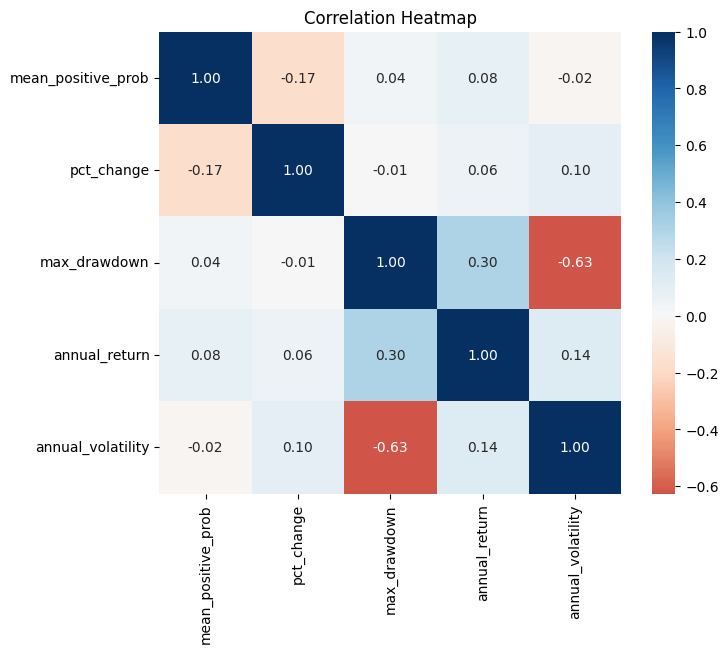

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = merged_df.drop(["stock_code"], axis=1).corr()

plt.figure(figsize=(8, 6)) 
sns.heatmap(corr_matrix, 
            annot=True,         
            cmap='RdBu',        
            center=0,           
            square=True,        
            fmt='.2f')          
plt.title('Correlation Heatmap')
plt.show()

In [248]:
import statsmodels.api as sm


df = merged_df


X = df[['pct_change']]             
y = df['mean_positive_prob']         


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     mean_positive_prob   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     105.4
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           2.19e-24
Time:                        16:59:35   Log-Likelihood:                 2666.4
No. Observations:                3591   AIC:                            -5329.
Df Residuals:                    3589   BIC:                            -5316.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3198      0.002    163.143      0.0

In [145]:
model = sm.OLS(df['mean_positive_prob'] , sm.add_constant(df[['max_drawdown']])).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     mean_positive_prob   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.733
Date:                Tue, 31 Dec 2024   Prob (F-statistic):             0.0297
Time:                        11:39:52   Log-Likelihood:                 2616.8
No. Observations:                3591   AIC:                            -5230.
Df Residuals:                    3589   BIC:                            -5217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3384      0.007     48.259   

In [250]:
model = sm.OLS(df['mean_positive_prob'] , sm.add_constant(df[['annual_return']])).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     mean_positive_prob   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     22.67
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           2.00e-06
Time:                        16:59:52   Log-Likelihood:                 2625.8
No. Observations:                3591   AIC:                            -5248.
Df Residuals:                    3589   BIC:                            -5235.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3159      0.003    124.354

In [249]:
model = sm.OLS(df['mean_positive_prob'] , sm.add_constant(df[['annual_volatility']])).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     mean_positive_prob   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.193
Date:                Tue, 31 Dec 2024   Prob (F-statistic):              0.139
Time:                        16:59:49   Log-Likelihood:                 2615.6
No. Observations:                3591   AIC:                            -5227.
Df Residuals:                    3589   BIC:                            -5215.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3319      0.00

In [148]:
model = sm.OLS(df['mean_positive_prob'] , sm.add_constant(df.drop(columns=["stock_code", "mean_positive_prob"]))).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     mean_positive_prob   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     34.57
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           2.32e-28
Time:                        11:45:04   Log-Likelihood:                 2682.4
No. Observations:                3591   AIC:                            -5355.
Df Residuals:                    3586   BIC:                            -5324.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3208      0.00

In [184]:
import tushare as ts
# 1f3d63f1a1d15d5c7864f4c9eff475702b5970669c597224a1b8a77d
ts.set_token('1f3d63f1a1d15d5c7864f4c9eff475702b5970669c597224a1b8a77d')
pro = ts.pro_api()
pro = ts.pro_api('1f3d63f1a1d15d5c7864f4c9eff475702b5970669c597224a1b8a77d')
df = pro.bak_basic(trade_date='20241227', fields='trade_date,ts_code,total_share')

In [185]:
df

,trade_date,ts_code,total_share
0,20241227,300141.SZ,2.54
1,20241227,300599.SZ,3.58
2,20241227,300547.SZ,2.17
3,20241227,301315.SZ,0.88
4,20241227,837403.BJ,0.71
...,...,...,...
5370,20241227,688583.SH,0.00
5371,20241227,603072.SH,0.00
5372,20241227,301601.SZ,0.00
5373,20241227,301581.SZ,0.00


In [186]:
df['ts_code'] = df['ts_code'].str.replace(r'\.(SZ|SH|BJ)$', '', regex=True)

In [187]:
df

,trade_date,ts_code,total_share
0,20241227,300141,2.54
1,20241227,300599,3.58
2,20241227,300547,2.17
3,20241227,301315,0.88
4,20241227,837403,0.71
...,...,...,...
5370,20241227,688583,0.00
5371,20241227,603072,0.00
5372,20241227,301601,0.00
5373,20241227,301581,0.00


In [188]:
merged_df1 = result_ajusted.merge(
    df,
    how='left',
    left_on='code',
    right_on='ts_code'
)
merged_df1 = merged_df1[merged_df1['date'].isin([pd.to_datetime('2024-12-27')])]
merged_df1

,date,code,open,high,low,close,preclose,volume,amount,adjustflag,tradestatus,pctChg,isST,turn,peTTM,trade_date,ts_code,total_share
1320201,2024-12-27,688779,5.47,5.5800000000,5.4400000000,5.52,5.4700000000,13217825,73018818.6900,2,1,0.914100,0,0.685100,-28.846590,20241227,688779,19.29
1320202,2024-12-27,688728,14.67,14.9900000000,14.4500000000,14.46,14.6700000000,15857179,233399113.2000,2,1,-1.431500,0,1.094400,5671.282662,20241227,688728,26.01
1320203,2024-12-27,000065,10.10,10.1900000000,10.0500000000,10.12,10.0400000000,9174460,92919379.7800,2,1,0.796800,0,1.012800,10.297037,20241227,000065,10.02
1320204,2024-12-27,000039,7.82,7.9300000000,7.8200000000,7.89,7.8300000000,31690316,249629900.7600,2,1,0.766300,0,1.377000,24.261379,20241227,000039,53.93
1320205,2024-12-27,000090,4.16,4.2400000000,4.1300000000,4.23,4.1400000000,19673120,82790408.4000,2,1,2.173900,0,1.052900,9.654168,20241227,000090,18.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325316,2024-12-27,002987,14.72,15.0800000000,14.6100000000,14.77,14.7100000000,10070748,149697694.4200,2,1,0.407900,0,1.672900,28.195998,20241227,002987,6.19
1325317,2024-12-27,002551,3.11,3.2200000000,3.0900000000,3.18,3.1100000000,15055808,47859325.6800,2,1,2.250800,0,2.466600,-18.192044,20241227,002551,8.45
1325318,2024-12-27,002778,16.56,18.1900000000,16.4800000000,18.19,16.5400000000,9871880,176873109.4000,2,1,9.975800,0,7.997900,-13.449504,20241227,002778,1.25
1325319,2024-12-27,002803,13.78,13.8400000000,13.4900000000,13.60,13.7500000000,10353985,141415231.1000,2,1,-1.090900,0,3.588400,32.899058,20241227,002803,3.85


In [189]:
merged_df1["current_market_value"] = merged_df1["total_share"] * merged_df1["close"]
merged_df1

,date,code,open,high,low,close,preclose,volume,amount,adjustflag,tradestatus,pctChg,isST,turn,peTTM,trade_date,ts_code,total_share,current_market_value
1320201,2024-12-27,688779,5.47,5.5800000000,5.4400000000,5.52,5.4700000000,13217825,73018818.6900,2,1,0.914100,0,0.685100,-28.846590,20241227,688779,19.29,106.4808
1320202,2024-12-27,688728,14.67,14.9900000000,14.4500000000,14.46,14.6700000000,15857179,233399113.2000,2,1,-1.431500,0,1.094400,5671.282662,20241227,688728,26.01,376.1046
1320203,2024-12-27,000065,10.10,10.1900000000,10.0500000000,10.12,10.0400000000,9174460,92919379.7800,2,1,0.796800,0,1.012800,10.297037,20241227,000065,10.02,101.4024
1320204,2024-12-27,000039,7.82,7.9300000000,7.8200000000,7.89,7.8300000000,31690316,249629900.7600,2,1,0.766300,0,1.377000,24.261379,20241227,000039,53.93,425.5077
1320205,2024-12-27,000090,4.16,4.2400000000,4.1300000000,4.23,4.1400000000,19673120,82790408.4000,2,1,2.173900,0,1.052900,9.654168,20241227,000090,18.69,79.0587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325316,2024-12-27,002987,14.72,15.0800000000,14.6100000000,14.77,14.7100000000,10070748,149697694.4200,2,1,0.407900,0,1.672900,28.195998,20241227,002987,6.19,91.4263
1325317,2024-12-27,002551,3.11,3.2200000000,3.0900000000,3.18,3.1100000000,15055808,47859325.6800,2,1,2.250800,0,2.466600,-18.192044,20241227,002551,8.45,26.8710
1325318,2024-12-27,002778,16.56,18.1900000000,16.4800000000,18.19,16.5400000000,9871880,176873109.4000,2,1,9.975800,0,7.997900,-13.449504,20241227,002778,1.25,22.7375
1325319,2024-12-27,002803,13.78,13.8400000000,13.4900000000,13.60,13.7500000000,10353985,141415231.1000,2,1,-1.090900,0,3.588400,32.899058,20241227,002803,3.85,52.3600


In [190]:
import pandas as pd

bins = [0, 50, 100, 500, 1000, float('inf')]
labels = ['<50', '50-100', '100-500', '500-1000', '>1000']


merged_df1['mv_group'] = pd.cut(
    merged_df1['current_market_value'], 
    bins=bins, 
    labels=labels,
    include_lowest=True
)

grouped = merged_df1.groupby('mv_group')['ts_code'].apply(list)
grouped

/var/folders/y3/9kxykjnn5kb8y6_f1xftvhdw0000gn/T/ipykernel_14659/545920682.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = merged_df1.groupby('mv_group')['ts_code'].apply(list)


mv_group
<50         [000571, 000705, 000518, 000020, 000586, 00004...
50-100      [000090, 000652, 000572, 688700, 000650, 00071...
100-500     [688779, 688728, 000065, 000039, 000415, 68870...
500-1000    [000425, 000301, 000002, 000100, 000617, 00015...
>1000       [688981, 000651, 000333, 000538, 000001, 00062...
Name: ts_code, dtype: object

In [192]:
grouped[0]

/var/folders/y3/9kxykjnn5kb8y6_f1xftvhdw0000gn/T/ipykernel_14659/348114183.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grouped[0]


['000571',
 '000705',
 '000518',
 '000020',
 '000586',
 '000040',
 '000573',
 '000639',
 '000417',
 '000638',
 '000707',
 '000514',
 '000752',
 '000584',
 '000576',
 '000510',
 '000679',
 '000609',
 '000554',
 '000601',
 '000004',
 '000007',
 '000720',
 '000663',
 '000695',
 '000622',
 '000558',
 '000533',
 '000599',
 '688788',
 '000751',
 '688767',
 '000626',
 '000545',
 '000668',
 '000691',
 '000056',
 '688711',
 '000711',
 '000548',
 '000055',
 '000430',
 '000608',
 '000610',
 '000546',
 '688720',
 '000669',
 '000619',
 '000710',
 '000605',
 '688719',
 '688786',
 '000665',
 '000428',
 '000551',
 '000607',
 '000010',
 '000615',
 '000692',
 '000698',
 '000722',
 '000507',
 '000633',
 '000701',
 '000632',
 '688699',
 '000593',
 '000506',
 '688701',
 '000565',
 '000635',
 '000715',
 '000042',
 '000153',
 '000509',
 '688733',
 '000419',
 '688799',
 '000068',
 '000590',
 '000702',
 '000678',
 '000655',
 '000570',
 '000677',
 '000713',
 '688718',
 '000504',
 '688737',
 '000659',
 '000532',

In [199]:
codes_lt_50 = grouped['<50']  
df_lt_50 = merged_df[merged_df['stock_code'].isin(codes_lt_50)]
model1 = sm.OLS(df_lt_50['mean_positive_prob'] , sm.add_constant(df_lt_50[['pct_change']])).fit()


print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:     mean_positive_prob   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     42.99
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           7.87e-11
Time:                        13:57:19   Log-Likelihood:                 793.13
No. Observations:                1330   AIC:                            -1582.
Df Residuals:                    1328   BIC:                            -1572.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3130      0.004     80.545      0.0

In [200]:
codes_lt_50 = grouped[1]  
df_lt_50 = merged_df[merged_df['stock_code'].isin(codes_lt_50)]
model2 = sm.OLS(df_lt_50['mean_positive_prob'] , sm.add_constant(df_lt_50[['pct_change']])).fit()


print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:     mean_positive_prob   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     20.70
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           6.06e-06
Time:                        13:57:21   Log-Likelihood:                 766.53
No. Observations:                 972   AIC:                            -1529.
Df Residuals:                     970   BIC:                            -1519.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3218      0.004     89.955      0.0

/var/folders/y3/9kxykjnn5kb8y6_f1xftvhdw0000gn/T/ipykernel_14659/2305428303.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  codes_lt_50 = grouped[1]


In [211]:
codes_lt_50 = grouped[2]  
df_lt_50 = merged_df[merged_df['stock_code'].isin(codes_lt_50)]
model3 = sm.OLS(df_lt_50['mean_positive_prob'] , sm.add_constant(df_lt_50[['pct_change']])).fit()


print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:     mean_positive_prob   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     40.07
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           3.65e-10
Time:                        14:17:05   Log-Likelihood:                 925.26
No. Observations:                1035   AIC:                            -1847.
Df Residuals:                    1033   BIC:                            -1837.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3219      0.003    104.358      0.0

/var/folders/y3/9kxykjnn5kb8y6_f1xftvhdw0000gn/T/ipykernel_14659/3322102061.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  codes_lt_50 = grouped[2]


In [202]:
codes_lt_50 = grouped[3]  
df_lt_50 = merged_df[merged_df['stock_code'].isin(codes_lt_50)]
model4 = sm.OLS(df_lt_50['mean_positive_prob'] , sm.add_constant(df_lt_50[['pct_change']])).fit()


print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:     mean_positive_prob   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     6.333
Date:                Tue, 31 Dec 2024   Prob (F-statistic):             0.0131
Time:                        13:57:22   Log-Likelihood:                 130.39
No. Observations:                 126   AIC:                            -256.8
Df Residuals:                     124   BIC:                            -251.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3355      0.008     42.451      0.0

/var/folders/y3/9kxykjnn5kb8y6_f1xftvhdw0000gn/T/ipykernel_14659/198242262.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  codes_lt_50 = grouped[3]


In [209]:
codes_lt_50 = grouped[4]  
df_lt_50 = merged_df[merged_df['stock_code'].isin(codes_lt_50)]
model5 = sm.OLS(df_lt_50['mean_positive_prob'] , sm.add_constant(df_lt_50[['pct_change']])).fit()


print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:     mean_positive_prob   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     13.34
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           0.000380
Time:                        14:11:08   Log-Likelihood:                 130.98
No. Observations:                 128   AIC:                            -258.0
Df Residuals:                     126   BIC:                            -252.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3376      0.008     43.568      0.0

/var/folders/y3/9kxykjnn5kb8y6_f1xftvhdw0000gn/T/ipykernel_14659/2820258125.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  codes_lt_50 = grouped[4]


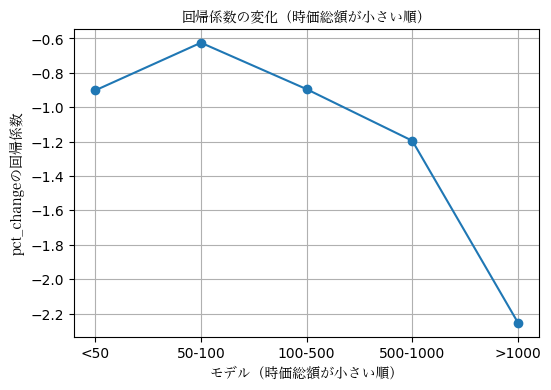

       グループ  pct_changeの回帰係数
0       <50        -0.902020
1    50-100        -0.624961
2   100-500        -0.895032
3  500-1000        -1.195210
4     >1000        -2.253265


In [210]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager as fm

jp_font = fm.FontProperties(fname='/System/Library/Fonts/ヒラギノ明朝 ProN.ttc')

# 5つの回帰モデル
models = [model1, model2, model3, model4, model5]

# 変数 "pct_change" の回帰係数を取り出す
coef_list = []
for i, mdl in enumerate(models, start=1):
    coef = mdl.params.get('pct_change', float('nan'))
    coef_list.append(coef)

# データフレームを作成
df_coef = pd.DataFrame({
    'グループ': grouped.index,      
    'pct_changeの回帰係数': coef_list
})

# 折れ線グラフを描画
plt.figure(figsize=(6,4), dpi=100)
plt.plot(df_coef['グループ'], df_coef['pct_changeの回帰係数'], marker='o', linestyle='-')
plt.title('回帰係数の変化（時価総額が小さい順）', fontproperties=jp_font)
plt.xlabel('モデル（時価総額が小さい順）', fontproperties=jp_font)
plt.ylabel('pct_changeの回帰係数', fontproperties=jp_font)
plt.grid(True)
plt.show()

# テーブルとして確認
print(df_coef)